In [105]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm
from urllib.request import urlopen

%matplotlib inline

In [106]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as gnb, BernoulliNB as bnb
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,auc,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler

%matplotlib inline


In [123]:
data =pd.read_csv('Customer_Behaviour.csv')

In [124]:
data.shape

(400, 5)

In [125]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [126]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [127]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [128]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [129]:
# removing userID column as it adds no value

data=data.drop('User ID',axis=1)

## Checking Distribution

In [130]:
Target_ratio=data['Purchased'].value_counts()/len(data['Purchased'])
Target_ratio

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

## ConvertCategorical Features

In [131]:
cat_features=data.columns[data.dtypes=='O']
print(*cat_features,sep='|')

Gender


In [132]:
new_data=pd.get_dummies(data,columns=cat_features)

In [133]:
new_data.shape

(400, 5)

In [134]:
new_data.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [135]:
X=new_data.drop('Purchased',axis=1)
Y=new_data['Purchased']

In [136]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

##  Normalizing data using StandardScalar/

In [137]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

## Calling and fitting the model

In [138]:
#Guassian model
gnb=GaussianNB()

gnb.fit(X_train,Y_train)
pred=gnb.predict(X_test)
accuScore_gnb=accuracy_score(pred,Y_test)
print(accuScore_gnb)

0.9125


In [139]:
#Bernoulli model
bnb=BernoulliNB()
bnb.fit(X_train,Y_train)
pred=bnb.predict(X_test)
accuScore_bnb=accuracy_score(pred,Y_test)
print(accuScore_bnb)

0.8125


<BarContainer object of 2 artists>

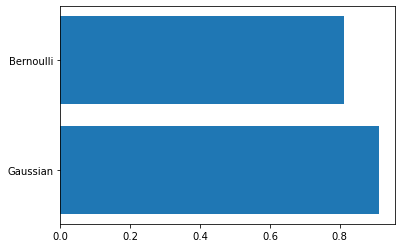

In [140]:
plt.barh(['Gaussian','Bernoulli'],(accuScore_gnb,accuScore_bnb))

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">As you can see, Gaussian has better accuracy than Bernoulli</span>
</div>